In [1]:
#Importing Dependencies 
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import re
#NLP Libraries
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

#Importing the below block to display all outputs 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Reading the csv file as a dataframe
df_formatted = pd.read_csv("Climate_change_ImportableFormat.csv", keep_default_na=False,  dtype=object)
df_formatted.head()

,date,user,is_retweet,is_quote,text,quoted_text,nextLineTweets,nextcolTweets
0,2021-09-26 00:52:18,YouHalal,False,True,#News #Trends #Data https://t.co/YyxQ75qppg,Americans are less concerned – but more divide...,https://t.co/A2uEPWAVnc https://t.co/tLGO9h3Xq5,
1,2021-09-26 00:52:18,FilmonKiros7,True,True,RT @GebremariamAng1: Do you realize that civil...,How we produce and use energy is the main caus...,Investing in clean affordable energy for all ...,
2,2021-09-26 00:52:21,fractalwhats,True,True,RT @KAG45Patriot: Having anxiety over the weather,something they have zero control over is stupid.,,Imagine having climate change anxiety lol http...
3,2021-09-26 00:52:22,alicanovinta,True,False,RT @AndrewDessler: In the last few years,I've noticed that students in my class often ...,,
4,2021-09-26 00:52:22,ssajoony,True,True,RT @GMA: FULL INTERVIEW: https://t.co/R3ErmHl5nm,,#BTS #ARMY #BTSonGMA 💜 .@ABC NEWS EXCLUSIVE: @...,


In [3]:
%%time
# Combining all the Tweet strings into a single column 
df_formatted["Combined_Tweet"] = df_formatted[['text', 'quoted_text', "nextLineTweets","nextcolTweets"]].agg(' '.join, axis=1)

Wall time: 1min 12s


In [4]:
#Displaying the top 5 rows
df_formatted.iloc[0:5]

,date,user,is_retweet,is_quote,text,quoted_text,nextLineTweets,nextcolTweets,Combined_Tweet
0,2021-09-26 00:52:18,YouHalal,False,True,#News #Trends #Data https://t.co/YyxQ75qppg,Americans are less concerned – but more divide...,https://t.co/A2uEPWAVnc https://t.co/tLGO9h3Xq5,,#News #Trends #Data https://t.co/YyxQ75qppg A...
1,2021-09-26 00:52:18,FilmonKiros7,True,True,RT @GebremariamAng1: Do you realize that civil...,How we produce and use energy is the main caus...,Investing in clean affordable energy for all ...,,RT @GebremariamAng1: Do you realize that civil...
2,2021-09-26 00:52:21,fractalwhats,True,True,RT @KAG45Patriot: Having anxiety over the weather,something they have zero control over is stupid.,,Imagine having climate change anxiety lol http...,RT @KAG45Patriot: Having anxiety over the weat...
3,2021-09-26 00:52:22,alicanovinta,True,False,RT @AndrewDessler: In the last few years,I've noticed that students in my class often ...,,,RT @AndrewDessler: In the last few years I've...
4,2021-09-26 00:52:22,ssajoony,True,True,RT @GMA: FULL INTERVIEW: https://t.co/R3ErmHl5nm,,#BTS #ARMY #BTSonGMA 💜 .@ABC NEWS EXCLUSIVE: @...,,RT @GMA: FULL INTERVIEW: https://t.co/R3ErmHl5...


In [19]:
# Printing out few tweets to understand analyze
for index, row in df_formatted.iloc[-15:].iterrows():
    print("---------------------Start----------------------------")
    print("Is Tweet a retweet : ", row["is_retweet"], " Is tweet quoted : ", row["is_quote"])
    print("Tweet:- ", row["Combined_Tweet"])
    print("---------------------End----------------------------")

---------------------Start----------------------------
Is Tweet a retweet :  False  Is tweet quoted :  False
Tweet:-  British climate activist Jessie Stevens is travelling 917 kilometres from her home in Devon  in southwest England https://t.co/F6Jiksfic9   to COP26 in Glasgow  Scotland  on a large cargo relay bike.
---------------------End----------------------------
---------------------Start----------------------------
Is Tweet a retweet :  False  Is tweet quoted :  False
Tweet:-  This visualization tool  Picturing Our Future https://t.co/zlohgDoLBu   shows the ultimate #SeaLevel 🌊🌊 rises that will occur in some of the largest cities around the globe if the global temperature rises by 3 degrees Celsius. Time for climate action is now! #ClimateAction  
---------------------End----------------------------
---------------------Start----------------------------
Is Tweet a retweet :  False  Is tweet quoted :  False
Tweet:-  World leaders need to consider the ocean's role in climate chang

In [27]:
#Creating an NLP object to detect the language of the string
def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

ValueError: [E004] Can't set up pipeline component: a factory for 'language_detector' already exists. Existing factory: <function get_lang_detector at 0x0000024DD09233A8>. New factory: <function get_lang_detector at 0x0000024DD0ACA4C8>

In [35]:
%%time
## WILL TAKE LONGER TO RUN
# Using the above function to save the language of the tweet
df_formatted["Tweet_Language"] = df_formatted.Combined_Tweet.apply(lambda x: nlp(x)._.language['language'])

#Wall time: 17.7 s for 1000 rows = there are 1615428 tweets so approxamitly it might take 8 hours to complete

In [37]:
#Looking at the language spread
df_formatted["Tweet_Language"].value_counts()

en         1557690
es            7835
ja            7204
th            6841
fr            6560
UNKNOWN       3970
it            3611
de            3559
id            3295
nl            2396
pt            2283
tr            1161
hi             725
fi             703
tl             670
sv             551
pl             547
af             494
ar             494
ca             465
da             384
so             366
et             361
ko             330
zh-cn          321
ro             290
cy             281
no             260
sw             228
fa             209
ru             149
el             138
ml             130
ta             113
cs              99
hr              94
sl              70
bn              65
lt              63
vi              63
ur              62
hu              39
mr              34
ne              31
he              30
gu              28
sq              27
lv              22
sk              19
mk              17
bg              15
te              13
zh-tw       

In [86]:
#Saving language identified as it takes time to identify again
df_formatted.to_csv("language_Identified_tweets.csv", index=False)

In [3]:
df_formatted = pd.read_csv("language_Identified_tweets.csv")

In [4]:
#Selecting only english tweets
EnglishTweets = df_formatted[df_formatted["Tweet_Language"] == 'en']
EnglishTweets.tail()

,date,user,is_retweet,is_quote,text,quoted_text,nextLineTweets,nextcolTweets,Combined_Tweet,Tweet_Language
1615422,2021-10-28 14:00:00,voicesofyouth,False,False,“I worry about the air that I breathe and the ...,now and in the future,As world leaders prepare for #COP26 young peo...,” says Emmanuel a 18-year-old artist from Nig...,“I worry about the air that I breathe and the ...,en
1615423,2021-10-28 14:00:00,WEIWEIDAI4,False,False,QUAD clearly is not a climate change organizat...,NaN,NaN,NaN,QUAD clearly is not a climate change organizat...,en
1615425,2021-10-28 14:00:00,yd_tweets,False,False,A gentle reminder for all the leaders attendin...,NaN,Roof of the World melting rapidly by @trtworld...,NaN,A gentle reminder for all the leaders attendin...,en
1615426,2021-10-28 14:00:00,SSGcoop,False,False,Calling all city planners,councillors,NaN,and policy wonks at #COP26! Join us on Nov. 3...,Calling all city planners councillors and p...,en
1615428,2021-10-28 14:00:00,underbite,True,False,RT @MikeHudema: The endangered blue whale is t...,NaN,NaN,NaN,RT @MikeHudema: The endangered blue whale is t...,en


### After looking at the tweet examples cleaning the tweets by performing the below actions
1. Removing Hyperlinks.
2. Removing Emojee's from the tweets.
3. Removing the # before a Hashtag as the tags would have useful information
4. Removing the @ mentions and RT at the start of a retweet tweet as its of no use to us
5. Replacing "& amp;" which basically represents &
6. Removing punctuations and extra spaces

In [5]:
%%time
## Creating a cleaner tweets function to clean the tweet
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
def cleantweets(tweet):
    tweet = re.sub(r'http\S+', '', tweet) #Removes hyper links
    tweet = emoji_pattern.sub(r'', tweet) #Removes Emojees.Symbols
    # stringliteral = re.sub(r'#\w\w+\s?', '', stringliteral) #Removes hashtag words
    tweet = tweet.replace("#", "") #Removing the hash before any tags
    tweet = re.sub(r'@\w\w+:\s?', '', tweet) #Removes @mentions with colon
    tweet = re.sub(r'@\w\w+\s?', '', tweet) #Removes @mentions without colon
    tweet = re.sub(r'\bRT\b\s+', '', tweet) #Removes RT at the beggining of a re tweet
    tweet = re.sub(r'&amp;', '&', tweet) #Replacing &amp; with & 
    tweet = re.sub(r"[^\w\s\d'%$&]", '', tweet) #Removing punctuations
    tweet = re.sub(' +', ' ', tweet) #Removing extra spaces
    tweet = re.sub(r"[^\u0000-\u007E]+",'',str(tweet))
    tweet = re.sub(r'[²³¹⁰ⁱ⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾ⁿ]+', '', str(tweet))
    return tweet

Wall time: 609 µs


In [6]:
#Creating an empty column to store the cleaned tweets
EnglishTweets["CleanedTweets"] = ''

C:\Users\mr081025\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
%%time
# Saving the cleaned tweets into a new column
EnglishTweets["CleanedTweets"] = EnglishTweets["Combined_Tweet"].apply(lambda x: cleantweets(x))

Wall time: 2min 42s


C:\Users\mr081025\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
#Looking at the cleaned tweets
for index, row in EnglishTweets.iloc[-10:].iterrows():
    print("---------------------Start----------------------------")
    print("Original Tweet: ", row["Combined_Tweet"])
    print("Cleaned Tweet:- ", row["CleanedTweets"])
    print("---------------------End----------------------------")

---------------------Start----------------------------
Original Tweet:  World leaders need to consider the ocean's role in climate change at #COP26. Ocean action is climate action. https://t.co/KM6Lnj8NR7   
Cleaned Tweet:-  World leaders need to consider the ocean's role in climate change at COP26 Ocean action is climate action 
---------------------End----------------------------
---------------------Start----------------------------
Original Tweet:  The first book for a general audience about global warming  1989's *The End of Nature* began our public reckoning with the climate crisis. Ahead of COP 26   learn more about the author  pioneering environmentalist @billmckibben in a @NewStatesman Q&amp;A: https://t.co/l3C7hGLYMP 
Cleaned Tweet:-  The first book for a general audience about global warming 1989's The End of Nature began our public reckoning with the climate crisis Ahead of COP 26 learn more about the author pioneering environmentalist in a Q&A 
---------------------End----

In [9]:
EnglishTweets.columns

Index(['date', 'user', 'is_retweet', 'is_quote', 'text', 'quoted_text',
       'nextLineTweets', 'nextcolTweets', 'Combined_Tweet', 'Tweet_Language',
       'CleanedTweets'],
      dtype='object')

In [10]:
#Discarding unwanted columns
EnglishTweets = EnglishTweets[['date', 'user', 'is_retweet', 'is_quote','Combined_Tweet', 'Tweet_Language', 'CleanedTweets']]

In [11]:
EnglishTweets.reset_index(inplace=True, drop=True)
EnglishTweets.head()
EnglishTweets.shape

,date,user,is_retweet,is_quote,Combined_Tweet,Tweet_Language,CleanedTweets
0,2021-09-26 00:52:18,YouHalal,False,True,#News #Trends #Data https://t.co/YyxQ75qppg A...,en,News Trends Data Americans are less concerned ...
1,2021-09-26 00:52:18,FilmonKiros7,True,True,RT @GebremariamAng1: Do you realize that civil...,en,Do you realize that civil war is the devastati...
2,2021-09-26 00:52:21,fractalwhats,True,True,RT @KAG45Patriot: Having anxiety over the weat...,en,Having anxiety over the weather something they...
3,2021-09-26 00:52:22,alicanovinta,True,False,RT @AndrewDessler: In the last few years I've...,en,In the last few years I've noticed that studen...
4,2021-09-26 00:52:22,ssajoony,True,True,RT @GMA: FULL INTERVIEW: https://t.co/R3ErmHl5...,en,FULL INTERVIEW BTS ARMY BTSonGMA NEWS EXCLUSIV...


(1557690, 7)

In [14]:
#saving a copy of cleaned tweets with the uncleaned for review
EnglishTweets.to_csv("Cleaned_English_tweets.csv", index=False)

In [13]:
EnglishTweets.shape

(1557690, 7)

In [88]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [100]:
%%time
TweetsConcatnated = ' '.join(EnglishTweets.CleanedTweets)

Wall time: 660 ms


In [104]:
%%time
UpdatedStopWords = STOPWORDS.update(["climate channge", "climate", "change", "global warming","global", "warming"])
WCObject = WordCloud(background_color='white', width=1600, height=800, stopwords=UpdatedStopWords)
WC = WCObject.generate(TweetsConcatnated)

Wall time: 1min 58s


<Figure size 1440x720 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

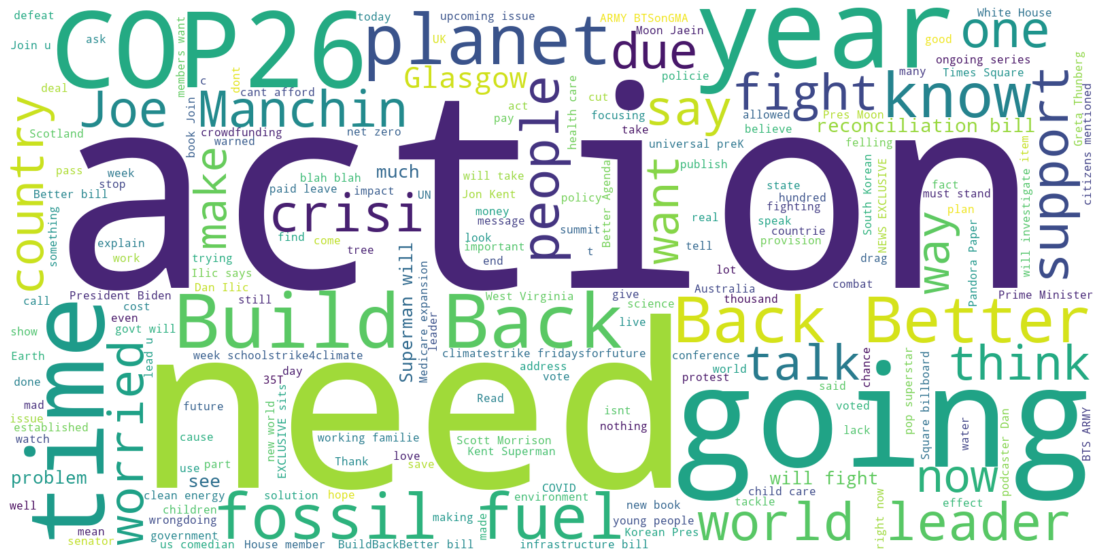

In [105]:
plt.figure(figsize=(20,10)) 
plt.axis('off')
plt.imshow(WC, interpolation='bilinear')
plt.savefig('ClimateChangeWordCloud.png', bbox_inches='tight')
plt.show()